In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
salaries = pd.read_csv('/Users/josephhartono/Downloads/nba_files/salaries_1985to2018.csv')
players = pd.read_csv('/Users/josephhartono/Downloads/nba_files/players.csv')
merged = pd.merge(left=salaries, right=players, left_on='player_id', right_on='_id')
# print(type(merged))
# display(merged)

In [3]:
def getString_range(rangeLength):
    list_of_lists = []
    ordinalList = []
    rangeVal = rangeLength

    for n in range(1,rangeVal):
        if(n == 11):
            ordinalList.append(str(n) + "th overall")
        elif(n == 12):
            ordinalList.append(str(n) + "th overall")
        elif(n == 13):
            ordinalList.append(str(n) + "th overall")        
        elif((n % 10) == 1):
            ordinalList.append(str(n) + "st overall")
        elif((n % 10) == 2):
            ordinalList.append(str(n) + "nd overall")
        elif((n % 10) == 3):
            ordinalList.append(str(n) + "rd overall")
        else:
            ordinalList.append(str(n) + "th overall")
            
    list_of_lists.append(ordinalList)
    #print(ordinalList)

    rangeList = []
    for n in range(1, rangeVal):
        rangeList.append(str(n))
    list_of_lists.append(rangeList)

    #print(rangeList)
    return list_of_lists


In [4]:
list = getString_range(100)
merged['draft_pick'] = merged['draft_pick'].replace(list[0], list[1])

In [5]:
def getSalary(year):
    
    time.sleep(1)
    
    yearString = str(year)
    year5 = year + 4
    from nba_api.stats.endpoints import drafthistory
    data = drafthistory.DraftHistory("00").get_data_frames()[0]
    data = data[data['SEASON'] == yearString]

    salaries2000 = merged[merged['draft_year'] == yearString]
    salaries2000 = salaries2000[salaries2000['season_start'] == year5]



    please = salaries2000['draft_pick'] = salaries2000['draft_pick'].astype(int)

    please = salaries2000.sort_values(by='draft_pick', ascending=True)
    
    return please



<Figure size 640x480 with 0 Axes>

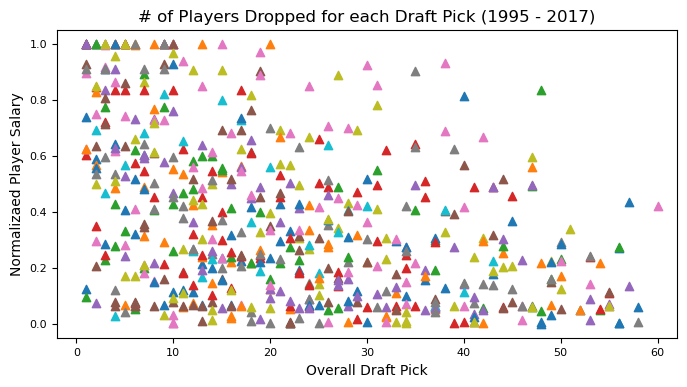

In [15]:
plt.clf()
Dict = {}

fig = plt.figure(figsize = (8, 4))
ax = fig.add_subplot(111)

for num in range(22):
    

    
    dataSheet = getSalary(1995 + num)
    
    max = 0
    
    for sal in dataSheet['salary']:
        if sal > max:
            max = sal
    
    #print(max)
    
    normal_sal = []
    
    
    
    for sal in dataSheet['salary']:
        normal_sal.append(sal/max)
    #print(normal_sal)
        
    dataSheet['normalized_salaries'] = normal_sal

    
    plt.scatter(dataSheet['draft_pick'], dataSheet['normalized_salaries'], marker='^')
    
    
    draft_picks = dataSheet['draft_pick']
    count = 1 

    temp_data = pd.DataFrame(columns=["NBA", "id", "salary", "2004-05", "2005", "2004", "Denver Nuggets", "id_", "December 30, 1977", "Saginaw, Michigan", "AST", "FG%", "FG%3", "FT%", "carG", "carP", "carPt", "carTR","carW","carEF", "college", "draft_pick", "draftR", "draftT", "draftY", "height" ,"hs", "name", "pos", "shoo", "weight"])

    for x in draft_picks:
        if(x != count):
            

            temp_data.loc[len(temp_data)] = ["NBA", "id", "0", "2004-05", "2005", "2004", "Denver Nuggets", "id_", "December 30, 1977", "Saginaw, Michigan", "AST", "FG%", "FG%3", "FT%", "carG", "carP", "carPt", "carTR","carW","carEF", "college", count, "draftR", "draftT", "draftY", "height" ,"hs", "name", "pos", "shoo", "weight"]

            count = x
            
            
            if Dict.get(count) is not None:
                Dict[count] = Dict[count] + 1
            else:
                Dict[count] = 1
            
            
            
            count = count + 1
        else:
            count = count + 1
    #display(two)
    #print(type(temp_data['salary']))
    #salary = temp_data['salary'] / max
    #plt.scatter(  temp_data['draft_pick'], temp_data['salary'], marker='x',color='r')
    #ax.scatter(  dataSheet['draft_pick'], dataSheet['salary'], marker='o', color ='g')

    




#ax.bar(Dict.keys(), Dict.values(), color = 'r', width = 0.6, alpha=0.5)

    
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlim([-2, 62])
#plt.figure(dpi=100)
#plt.ylim([-0.2, 12])
plt.ylim([-0.05, 1.05])
plt.ylabel("Normalizaed Player Salary")
plt.xlabel('Overall Draft Pick')
plt.title('# of Players Dropped for each Draft Pick (1995 - 2017)')
plt.show()

In [1]:
import pandas as pd
df = pd.read_csv('/Users/josephhartono/Documents/GitHub/NBA-Draft-Biola-Summer-Research/salaries_w_bins_1984_to_2021.csv')
# df = df[['name' ,'salary', 'season_start']]
df

,name,salary,season_start,season_end,salary_bin,position
0,Kareem Abdul-Jabbar,1530000,1984,1985,average,Center
1,Alvan Adams,500000,1984,1985,below average,Center and Power Forward
2,Mark Aguirre,800000,1984,1985,below average,Small Forward
3,Danny Ainge,400000,1984,1985,minimum,Shooting Guard and Point Guard
4,John Bagley,209000,1984,1985,minimum,Point Guard
...,...,...,...,...,...,...
15930,Craig Sword,53176,2021,2022,minimum,Shooting Guard
15931,Luca Vildoza,42789,2021,2022,minimum,Point Guard
15932,Zavier Simpson,37223,2021,2022,minimum,Point Guard
15933,Mfiondu Kabengele,19186,2021,2022,minimum,Center


In [14]:
df.loc[df['name'] == "LeBron James"]

,name,salary,season_start
6985,LeBron James,4018920,2003
7453,LeBron James,4320360,2004
7940,LeBron James,4621800,2005
8438,LeBron James,5828090,2006
8935,LeBron James,13041250,2007
9421,LeBron James,14410581,2008
9910,LeBron James,15779912,2009
10374,LeBron James,14500000,2010
10840,LeBron James,16022500,2011
11308,LeBron James,17545000,2012


In [8]:
df1 = pd.read_csv('PIE_overall_yearsAfter', index_col=[0])
df1

,PLAYER,PIE,Year,overall,yearsAfter
1,Aaron McKie,9.5,1996,17.0,2
3,Acie Earl,5.6,1996,19.0,3
4,Adam Keefe,8.3,1996,10.0,4
6,Alan Henderson,7.5,1996,16.0,1
8,Allan Houston,7.8,1996,11.0,3
...,...,...,...,...,...
12298,Xavier Tillman,9.4,2021,35.0,1
12301,Zach Collins,10.7,2021,10.0,4
12302,Zach LaVine,12.9,2021,13.0,7
12304,Zeke Nnaji,7.8,2021,22.0,1


In [19]:
df1.loc[(df1['PLAYER'] == "LeBron James") & (df1['Year'] > 2010)]

,PLAYER,PIE,Year,overall,yearsAfter
6985,LeBron James,22.0,2011,1.0,8
7454,LeBron James,22.1,2012,1.0,9
7914,LeBron James,20.0,2013,1.0,10
8410,LeBron James,17.1,2014,1.0,11
8892,LeBron James,18.9,2015,1.0,12
9369,LeBron James,18.3,2016,1.0,13
9888,LeBron James,19.1,2017,1.0,14
10433,LeBron James,18.8,2018,1.0,15
10960,LeBron James,19.8,2019,1.0,16
11495,LeBron James,19.1,2020,1.0,17


In [15]:
df1

,PLAYER,PIE,Year,overall,yearsAfter
1,Aaron McKie,9.5,1996,17.0,2
3,Acie Earl,5.6,1996,19.0,3
4,Adam Keefe,8.3,1996,10.0,4
6,Alan Henderson,7.5,1996,16.0,1
8,Allan Houston,7.8,1996,11.0,3
...,...,...,...,...,...
12298,Xavier Tillman,9.4,2021,35.0,1
12301,Zach Collins,10.7,2021,10.0,4
12302,Zach LaVine,12.9,2021,13.0,7
12304,Zeke Nnaji,7.8,2021,22.0,1


for name in df1:
    try:
        loc based on name and year to get salary
        get value
        append to lsit
    except:
        append negative 1
    

In [20]:
salaries = []

for row in df1.itertuples():
    

    
    try:
        player = df[(df['name']==row.PLAYER) & (df['season_start']==row.Year)].head()
        salary = player['salary'].values[0]
        salary = int(salary)
        

        
        
        
    
        
        salaries.append(salary)
    except:
        salaries.append(-1)



In [22]:
df1['salary'] = salaries

In [23]:
df1

,PLAYER,PIE,Year,overall,yearsAfter,salary
1,Aaron McKie,9.5,1996,17.0,2,1040000
3,Acie Earl,5.6,1996,19.0,3,1235000
4,Adam Keefe,8.3,1996,10.0,4,1950000
6,Alan Henderson,7.5,1996,16.0,1,910000
8,Allan Houston,7.8,1996,11.0,3,5000000
...,...,...,...,...,...,...
12298,Xavier Tillman,9.4,2021,35.0,1,-1
12301,Zach Collins,10.7,2021,10.0,4,-1
12302,Zach LaVine,12.9,2021,13.0,7,-1
12304,Zeke Nnaji,7.8,2021,22.0,1,-1


In [29]:
finaldf = df1[df1['salary'] != -1]
finaldf.to_csv('FINAL_data_pie_draftyear_overall_salary')

In [25]:
df1.loc[(df1['PLAYER'] == "Zach LaVine")]

,PLAYER,PIE,Year,overall,yearsAfter,salary
8597,Zach LaVine,7.9,2014,13.0,0,2055840
9074,Zach LaVine,9.1,2015,13.0,1,2148360
9560,Zach LaVine,9.5,2016,13.0,2,2240880
10099,Zach LaVine,9.2,2017,13.0,3,-1
10628,Zach LaVine,12.5,2018,13.0,4,-1
11157,Zach LaVine,13.0,2019,13.0,5,-1
11699,Zach LaVine,14.0,2020,13.0,6,-1
12302,Zach LaVine,12.9,2021,13.0,7,-1


In [27]:
df.loc[(df['name'] == "Zach LaVine")]

,name,salary,season_start
12284,Zach LaVine,2055840,2014
12814,Zach LaVine,2148360,2015
13345,Zach LaVine,2240880,2016
